# Cleaning

In [1]:
# Importation of libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the file
df = pd.read_csv('repositories.csv')
df.head()

,name,url,description,stars,created_at,language,forks,watchers,open_issues,owner
0,notepad--,https://github.com/cxasm/notepad--,一个支持windows/linux/mac的文本编辑器，目标是做中国人自己的编辑器，来自中国。,2939,2022-06-15T02:50:15Z,C++,117,2939,114,cxasm
1,pocket-casts-android,https://github.com/Automattic/pocket-casts-and...,Pocket Casts Android 🎧,2250,2022-06-15T12:41:42Z,Kotlin,168,2250,252,Automattic
2,nvim-basic-ide,https://github.com/LunarVim/nvim-basic-ide,🪨 This is my attempt at a basic stable startin...,1664,2022-06-15T23:06:53Z,Lua,436,1664,3,LunarVim
3,sismo-hub,https://github.com/sismo-core/sismo-hub,NaN,893,2022-06-15T16:44:53Z,TypeScript,184,893,7,sismo-core
4,Antenna,https://github.com/wuba/Antenna,Antenna是58同城安全团队打造的一款辅助安全从业人员验证网络中多种漏洞是否存在以及可利...,675,2022-06-15T06:42:25Z,JavaScript,72,675,3,wuba


In [3]:
# Size
print(df.shape)

(18300, 10)


In [4]:
# Check if watchers column equal to stars column
is_identical = df['watchers'].equals(df['stars'])
print(is_identical)

True


In [5]:
# Drop watchers column
df.drop('watchers', axis=1, inplace=True)

In [6]:
# Count duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 0


In [7]:
# Count missing values
missing_count = df.isnull().sum()
print("Number of missing values:")
print(df.isnull().sum().to_string())

Number of missing values:
name              0
url               0
description    2083
stars             0
created_at        0
language       2231
forks             0
open_issues       0
owner             0


In [8]:
# Fill missing values in the 'description' column
df['description'] = df['description'].fillna('There is no description')

In [9]:
# Drop rows with missing values in the 'language' column
df.dropna(subset=['language'], inplace=True)

In [10]:
# Count missing values
print("Number of missing values:")
print(df.isnull().sum().to_string())

Number of missing values:
name           0
url            0
description    0
stars          0
created_at     0
language       0
forks          0
open_issues    0
owner          0


In [11]:
# Convert data types if needed
df['created_at'] = pd.to_datetime(df['created_at'])

In [12]:
df.head()

,name,url,description,stars,created_at,language,forks,open_issues,owner
0,notepad--,https://github.com/cxasm/notepad--,一个支持windows/linux/mac的文本编辑器，目标是做中国人自己的编辑器，来自中国。,2939,2022-06-15 02:50:15+00:00,C++,117,114,cxasm
1,pocket-casts-android,https://github.com/Automattic/pocket-casts-and...,Pocket Casts Android 🎧,2250,2022-06-15 12:41:42+00:00,Kotlin,168,252,Automattic
2,nvim-basic-ide,https://github.com/LunarVim/nvim-basic-ide,🪨 This is my attempt at a basic stable startin...,1664,2022-06-15 23:06:53+00:00,Lua,436,3,LunarVim
3,sismo-hub,https://github.com/sismo-core/sismo-hub,There is no description,893,2022-06-15 16:44:53+00:00,TypeScript,184,7,sismo-core
4,Antenna,https://github.com/wuba/Antenna,Antenna是58同城安全团队打造的一款辅助安全从业人员验证网络中多种漏洞是否存在以及可利...,675,2022-06-15 06:42:25+00:00,JavaScript,72,3,wuba


In [13]:
# Size
print(df.shape)

(16069, 9)


In [14]:
df.describe()

,stars,forks,open_issues
count,16069.000000,16069.000000,16069.000000
mean,469.774224,70.936773,10.505321
std,2350.700859,554.771349,51.071333
min,14.000000,0.000000,0.000000
25%,85.000000,6.000000,0.000000
50%,134.000000,14.000000,2.000000
75%,272.000000,36.000000,7.000000
max,140875.000000,31289.000000,2951.000000


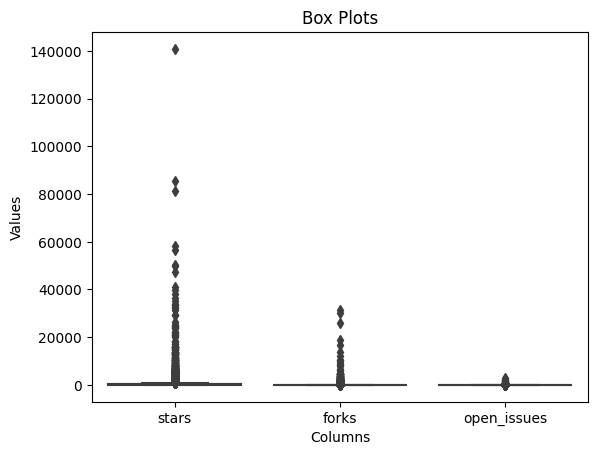

In [15]:
# Create box plots for each column
sns.boxplot(data=df[['stars', 'forks','open_issues']])
plt.title('Box Plots')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

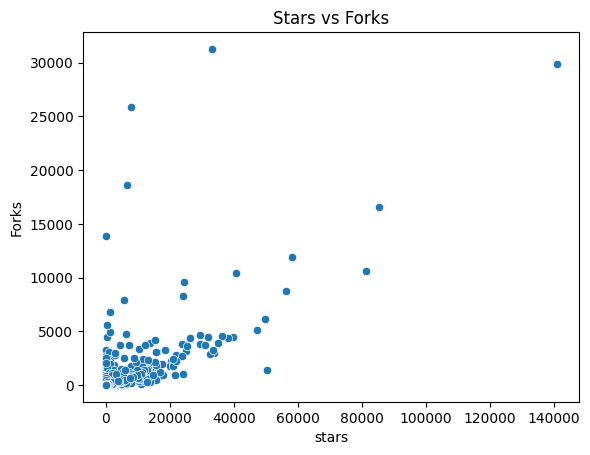

In [16]:
# Create a scatter plot with 'stars' and 'forks'
sns.scatterplot(x='stars', y='forks', data=df)
plt.xlabel('stars')
plt.ylabel('Forks')
plt.title('Stars vs Forks')
plt.show()

In [17]:
df.describe()

,stars,forks,open_issues
count,16069.000000,16069.000000,16069.000000
mean,469.774224,70.936773,10.505321
std,2350.700859,554.771349,51.071333
min,14.000000,0.000000,0.000000
25%,85.000000,6.000000,0.000000
50%,134.000000,14.000000,2.000000
75%,272.000000,36.000000,7.000000
max,140875.000000,31289.000000,2951.000000


In [18]:
import re

# Function to clean the description text
def clean_description(description):
    # Remove special characters, emojis, and non-alphanumeric characters
    cleaned_text = re.sub(r'[^\w\s]', '', description)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text.strip()

# Clean the values in the 'description' column
df['description'] = df['description'].apply(clean_description)

In [19]:
df.head()

,name,url,description,stars,created_at,language,forks,open_issues,owner
0,notepad--,https://github.com/cxasm/notepad--,一个支持windowslinuxmac的文本编辑器目标是做中国人自己的编辑器来自中国,2939,2022-06-15 02:50:15+00:00,C++,117,114,cxasm
1,pocket-casts-android,https://github.com/Automattic/pocket-casts-and...,Pocket Casts Android,2250,2022-06-15 12:41:42+00:00,Kotlin,168,252,Automattic
2,nvim-basic-ide,https://github.com/LunarVim/nvim-basic-ide,This is my attempt at a basic stable starting ...,1664,2022-06-15 23:06:53+00:00,Lua,436,3,LunarVim
3,sismo-hub,https://github.com/sismo-core/sismo-hub,There is no description,893,2022-06-15 16:44:53+00:00,TypeScript,184,7,sismo-core
4,Antenna,https://github.com/wuba/Antenna,Antenna是58同城安全团队打造的一款辅助安全从业人员验证网络中多种漏洞是否存在以及可利...,675,2022-06-15 06:42:25+00:00,JavaScript,72,3,wuba


In [20]:
# Check if special characters, emojis, and non-alphanumeric characters have been removed
differences_found = False  # Flag to track if any differences were found

for index, row in df.iterrows():
    original_description = str(row['description'])
    cleaned_description = clean_description(original_description)
    
    if original_description != cleaned_description:
        print(f"Differences found in Description at row {index}:")
        print(f"Original Description: {original_description}")
        print(f"Cleaned Description: {cleaned_description}")
        print("-------------------------------")
        differences_found = True

if not differences_found:
    print("No special characters, emojis, or non-alphanumeric characters found in any of the descriptions.")

No special characters, emojis, or non-alphanumeric characters found in any of the descriptions.


In [21]:
# Return only the rows with an empty 'description'
df.loc[df['description'] == '']

,name,url,description,stars,created_at,language,forks,open_issues,owner
2778,f1-championship-stats,https://github.com/planetscale/f1-championship...,,124,2022-08-09 16:28:20+00:00,TypeScript,5,10,planetscale
6479,SparkleC,https://github.com/Kartatz/SparkleC,,94,2022-10-22 04:13:28+00:00,C,10,0,Kartatz
10357,volar.js,https://github.com/volarjs/volar.js,,298,2023-01-08 14:27:04+00:00,TypeScript,12,9,volarjs


In [22]:
# Replace empty values with 'There is no description'
df.loc[df['description'] == '', 'description'] = 'There is no description'

In [23]:
# Return only the rows with an empty 'description'
df.loc[df['description'] == '']

,name,url,description,stars,created_at,language,forks,open_issues,owner


In [24]:
print(df.shape)

(16069, 9)


In [25]:
df.head()

,name,url,description,stars,created_at,language,forks,open_issues,owner
0,notepad--,https://github.com/cxasm/notepad--,一个支持windowslinuxmac的文本编辑器目标是做中国人自己的编辑器来自中国,2939,2022-06-15 02:50:15+00:00,C++,117,114,cxasm
1,pocket-casts-android,https://github.com/Automattic/pocket-casts-and...,Pocket Casts Android,2250,2022-06-15 12:41:42+00:00,Kotlin,168,252,Automattic
2,nvim-basic-ide,https://github.com/LunarVim/nvim-basic-ide,This is my attempt at a basic stable starting ...,1664,2022-06-15 23:06:53+00:00,Lua,436,3,LunarVim
3,sismo-hub,https://github.com/sismo-core/sismo-hub,There is no description,893,2022-06-15 16:44:53+00:00,TypeScript,184,7,sismo-core
4,Antenna,https://github.com/wuba/Antenna,Antenna是58同城安全团队打造的一款辅助安全从业人员验证网络中多种漏洞是否存在以及可利...,675,2022-06-15 06:42:25+00:00,JavaScript,72,3,wuba


In [ ]:
import pandas as pd
from ibm_watson import LanguageTranslatorV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_cloud_sdk_core.api_exception import ApiException

# Initialize the Language Translator client
authenticator = IAMAuthenticator('key')
language_translator = LanguageTranslatorV3(
    version='version',
    authenticator=authenticator
)
language_translator.set_service_url('url')

# Function to translate text
def translate_text(text, source_lang, target_lang):
    try:
        translation = language_translator.translate(
            text=text,
            model_id=f'{source_lang}-{target_lang}'
        ).get_result()

        translated_text = translation['translations'][0]['translation']
        return translated_text
    except ApiException as e:
        if e.code == 404:
            print("Translation model not found. Please check the language codes.")
        else:
            print("An error occurred during translation:", e)
        return ''

# Specify the column to translate
column_to_translate = 'description'  # Replace with your desired column name

# List of language codes in your DataFrame
language_codes = ['en', 'fr', 'de', 'es']  # Add more language codes as needed

# Specify the target language
target_lang = 'en'  # The target language is English

# Iterate over each language code and translate the text
for lang_code in language_codes:
    # Create a new column to store the translated text for each language
    df[f'translated_description_{lang_code}'] = ''

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        description = str(row[column_to_translate])

        # Translate the description if it's not already in English
        if description and row['language'] != lang_code:
            translated_description = translate_text(description, lang_code, target_lang)
            df.at[index, f'translated_description_{lang_code}'] = translated_description

# Save the updated DataFrame to a new CSV file
df.to_csv('Translated_file.csv', index=False)